In [3]:
import skimage
%matplotlib inline
from skimage import io
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def compute_Gaussian_pyramid(img, levels, sigma):
    from scipy import ndimage as ndi
    from skimage.transform import resize
    pyr = {}
    for i in range(0, levels+1):
        pyr[i]=img
        img_filter_result = ndi.gaussian_filter(img, sigma)
        half_size = (img_filter_result.shape[0]/2,img_filter_result.shape[1]/2)
        img_half_size = resize(img_filter_result, half_size)
        img = img_half_size
    return pyr

In [6]:
from skimage import io
from skimage.color import rgb2gray

img_c = io.imread('lena.jpg')
img_g = rgb2gray(img_c)
pyr = compute_Gaussian_pyramid(img_g, levels=4, sigma=2*2/6.0)

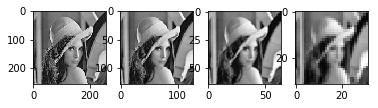

In [7]:
plt.figure(1)
plt.subplot(141)
plt.imshow(pyr[0], cmap="gray")
plt.subplot(142)
plt.imshow(pyr[1], cmap="gray")
plt.subplot(143)
plt.imshow(pyr[2], cmap="gray")
plt.subplot(144)
plt.imshow(pyr[3], cmap="gray")

In [8]:
########## EX2

def histogram_equalize2(img):
    # https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html
    # as input, a grayscale image and performs histogram equalization. The function should output the histogram-equalized image.
    import numpy as np
    img = rgb2gray(img)

    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()

    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    out = cdf[img]
    from skimage import img_as_float
    out = img_as_float(out)
    return out

def histogram_equalize(img):
    img = rgb2gray(img)
    img_cdf, bin_centers = exposure.cumulative_distribution(img)
    img_cdf_2 = img_cdf*255
    img_cdf_2 = [int(round(x)) for x in img_cdf_2]
    equ_vals = {}
    for i in range(0,len(bin_centers)):
        equ_vals[bin_centers[i]]=img_cdf_2[i]
    
    out = np.copy(img)
    for i in range(0,len(img)):
        for j in range(0,len(img[i])):
            out[i][j] = equ_vals[img[i][j]]
    return out

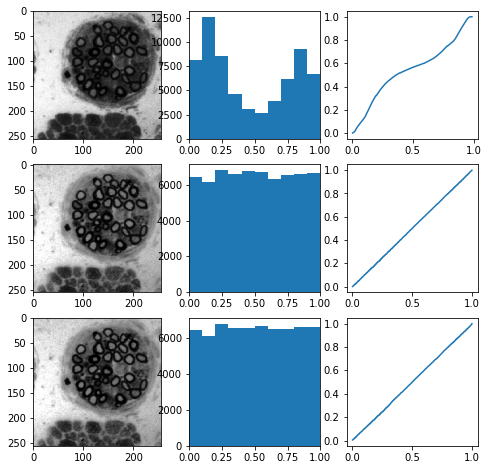

In [9]:
from skimage import exposure
from skimage import io
from skimage import img_as_float
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage.exposure import equalize_hist
from skimage import exposure

img = io.imread("myelin.png")
#img = io.imread("lena.jpg")

#equ_img = histogram_equalize(img)
equ_img = histogram_equalize(img)
img = img_as_float(img)
img.shape
img_cdf, bin_centers = exposure.cumulative_distribution(img)

#?np.interp
# choosing bining of the histogram about 10
#org_hist = exposure.histogram(img, nbins=10)

equ_img = img_as_float(equ_img)
equ_img_cdf, equ_bin_centers = exposure.cumulative_distribution(equ_img)

impl_img = equalize_hist(img)
impl_img_cdf, impl_bin_centers = exposure.cumulative_distribution(impl_img)


my_bins = 10

plt.figure(num=1, figsize=(8,8))
plt.subplot(331)
plt.imshow(img, cmap="gray")
plt.subplot(332)
plt.hist(img.flatten(),bins=my_bins,range=[0,1])
plt.xlim([0,1])
plt.subplot(333)
plt.plot (bin_centers, img_cdf)
# my own function
plt.subplot(334)
plt.imshow(equ_img, cmap="gray")
plt.subplot(335)
plt.hist(equ_img.flatten(),bins=my_bins,range=[0,1])
plt.xlim([0,1])
plt.subplot(336)
plt.plot (equ_bin_centers, equ_img_cdf)

# implemented function
plt.subplot(337)
plt.imshow(impl_img, cmap="gray")
plt.subplot(338)
plt.hist(impl_img.flatten(),bins=my_bins,range=[0,1])
plt.xlim([0,1])
plt.subplot(339)
plt.plot (impl_bin_centers, impl_img_cdf)


In [10]:
def histogram_match(source, target):
    source = rgb2gray(source)
    target = rgb2gray(target)

    img_cdf, bin_centers = exposure.cumulative_distribution(source)
    img_cdf_2 = img_cdf*255
    img_cdf_2 = [int(round(x)) for x in img_cdf_2]
    equ_vals = {}
    for i in range(0,len(bin_centers)):
        equ_vals[bin_centers[i]]=img_cdf_2[i]
    
    out = np.copy(img)
    for i in range(0,len(img)):
        for j in range(0,len(img[i])):
            out[i][j] = equ_vals[img[i][j]]
            
    # make a table for the target
    m_cdf, mbin_centers = exposure.cumulative_distribution(target)
    m_cdf_2 = m_cdf*255
    m_cdf_2 = [int(round(x)) for x in m_cdf_2]
    # create inverse table
    match_vals = {key: key for key in range(0,256)}
    print match_vals
    for i in range(0,len(bin_centers)):
        match_vals[m_cdf_2[i]] = mbin_centers[i]
    print match_vals
    # use the table on the equalized source image
    matched = np.copy(out)
    for i in range(0,len(img)):
        for j in range(0,len(img[i])):
            matched[i][j] = match_vals[img[i][j]]
    return matched

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119: 119, 120: 120, 121: 121,

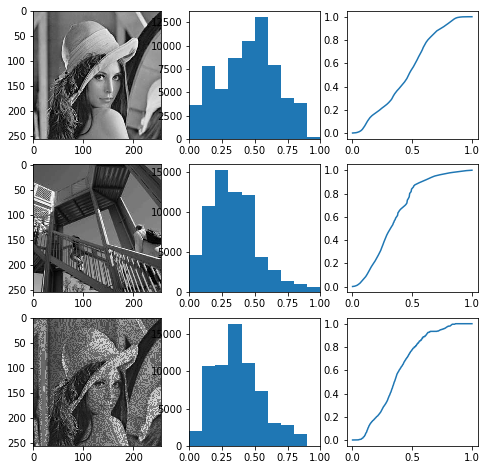

In [11]:
from skimage import exposure
from skimage import io
from skimage import img_as_float
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage.exposure import equalize_hist
from skimage import exposure

img = io.imread("lena.jpg")
target = io.imread("stairs.jpg")

#equ_img = histogram_equalize(img)
matched_img = histogram_match(img, target)
img = img_as_float(img)
img.shape
img_cdf, bin_centers = exposure.cumulative_distribution(img)

target = img_as_float(target)
target_img_cdf, target_bin_centers = exposure.cumulative_distribution(target)

matched_img = img_as_float(matched_img)
matched_img_img_cdf, matched_img_bin_centers = exposure.cumulative_distribution(matched_img)


my_bins = 10

plt.figure(num=1, figsize=(8,8))
plt.subplot(331)
plt.imshow(img, cmap="gray")
plt.subplot(332)
plt.hist(img.flatten(),bins=my_bins,range=[0,1])
plt.xlim([0,1])
plt.subplot(333)
plt.plot (bin_centers, img_cdf)
# my own function
plt.subplot(334)
plt.imshow(target, cmap="gray")
plt.subplot(335)
plt.hist(target.flatten(),bins=my_bins,range=[0,1])
plt.xlim([0,1])
plt.subplot(336)
plt.plot (target_bin_centers, target_img_cdf)

# implemented function
plt.subplot(337)
plt.imshow(matched_img, cmap="gray")
plt.subplot(338)
plt.hist(matched_img.flatten(),bins=my_bins,range=[0,1])
plt.xlim([0,1])
plt.subplot(339)
plt.plot (matched_img_bin_centers, matched_img_img_cdf)


In [ ]:
#np.histogram(img, bins=256)
# Ex3 same principle 